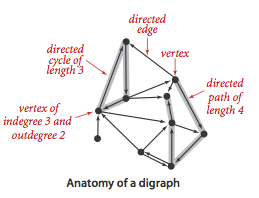

In [3]:
import findspark
findspark.init()
import pyspark

In [2]:
sc.stop()

NameError: name 'sc' is not defined

In [4]:
sc = pyspark.SparkContext(appName="graphs")

test on small rdd for finding a sink

In [ ]:
rdd = sc.parallelize([('1','4'), ('2','4'), ('3','4'), ('3','2') ])
rdd2 = rdd.map (lambda x : (x[1], x[0]))
rdd2 = rdd2.groupByKey()
rdd2 = rdd2.map (lambda x : (x[0], list(x[1])))
rdd3 = rdd.groupByKey()
rdd3 = rdd3.map (lambda x : (x[0], list(x[1])))
rdd4 = rdd2.subtractByKey(rdd3)

In [ ]:
rdd4.collect()

Find Sinks on big graph file

In [ ]:
rdd = sc.textFile("C:/Users/EASYFRONT/Documents/BD/requetessql/data/graph.txt")
rdd = rdd.map(lambda x : x.split('\t'))
#get the edges i.e eliminate the label and keep vertices only
rdd2 = rdd.map (lambda x : (x[2], x[0]))
#get the incoming edges for each node or vertex
rdd2 = rdd2.groupByKey()
rdd2 = rdd2.map (lambda x : (x[0], list(x[1])))

In [ ]:
#get the outcoming edges for each node 
rdd3 = rdd.map (lambda x : (x[0], x[2]))
rdd3 = rdd3.groupByKey()
rdd3 = rdd3.map (lambda x : (x[0], list(x[1])))

In [ ]:
rdd3.collect()

In [ ]:
# filter nodes having only incoming edgesand having no outgoing edges
rdd4 = rdd2.subtractByKey(rdd3)
rdd4.collect()

Finding Universal Sinks

In [5]:
#rddus = sc.parallelize([('1','3'), ('2','3'), ('3','4'),('2','4'),('1','4')])
rddus = sc.textFile("C:/Users/EASYFRONT/Documents/BD/requetessql/data/graph.txt")
rddus = rddus.map(lambda x : x.split('\t'))
rddus = rddus.map(lambda x : (x[0], x[2]))
#eliminate potential duplicate edges
rddus = rddus.distinct()

In [6]:
rddus.collect()

[('4', '274'),
 ('532', '800'),
 ('973', '814'),
 ('469', '9'),
 ('158', '492'),
 ('308', '58'),
 ('526', '387'),
 ('954', '969'),
 ('130', '410'),
 ('321', '384'),
 ('252', '63'),
 ('898', '508'),
 ('470', '348'),
 ('16', '54'),
 ('74', '691'),
 ('751', '273'),
 ('207', '64'),
 ('304', '274'),
 ('414', '422'),
 ('524', '196'),
 ('629', '579'),
 ('661', '36'),
 ('504', '823'),
 ('148', '85'),
 ('797', '752'),
 ('297', '800'),
 ('54', '557'),
 ('394', '126'),
 ('407', '438'),
 ('173', '223'),
 ('198', '134'),
 ('251', '672'),
 ('195', '609'),
 ('85', '78'),
 ('261', '11'),
 ('254', '729'),
 ('220', '149'),
 ('71', '81'),
 ('908', '969'),
 ('601', '245'),
 ('332', '777'),
 ('70', '695'),
 ('761', '751'),
 ('26', '316'),
 ('1', '48'),
 ('282', '289'),
 ('876', '251'),
 ('160', '222'),
 ('564', '33'),
 ('644', '880'),
 ('770', '942'),
 ('11', '23'),
 ('376', '164'),
 ('297', '377'),
 ('564', '570'),
 ('783', '957'),
 ('269', '5'),
 ('579', '204'),
 ('226', '179'),
 ('605', '32'),
 ('461', 

In [ ]:
rddus.count()

In [7]:
#We need to count how many nodes we have in the graph
nbnodes = rddus.flatMap(lambda x: [x[0]]+[x[1]]).distinct().count()
nbnodes

475

In [9]:
#Compute graph sinks
rdds = rddus.map(lambda x : (x[1], x[0]))
rddsinks = rdds.subtractByKey(rddus).map(lambda x : (x[1],x[0]))
rdds.collect()

[('274', '4'),
 ('800', '532'),
 ('814', '973'),
 ('9', '469'),
 ('492', '158'),
 ('58', '308'),
 ('387', '526'),
 ('969', '954'),
 ('410', '130'),
 ('384', '321'),
 ('63', '252'),
 ('508', '898'),
 ('348', '470'),
 ('54', '16'),
 ('691', '74'),
 ('273', '751'),
 ('64', '207'),
 ('274', '304'),
 ('422', '414'),
 ('196', '524'),
 ('579', '629'),
 ('36', '661'),
 ('823', '504'),
 ('85', '148'),
 ('752', '797'),
 ('800', '297'),
 ('557', '54'),
 ('126', '394'),
 ('438', '407'),
 ('223', '173'),
 ('134', '198'),
 ('672', '251'),
 ('609', '195'),
 ('78', '85'),
 ('11', '261'),
 ('729', '254'),
 ('149', '220'),
 ('81', '71'),
 ('969', '908'),
 ('245', '601'),
 ('777', '332'),
 ('695', '70'),
 ('751', '761'),
 ('316', '26'),
 ('48', '1'),
 ('289', '282'),
 ('251', '876'),
 ('222', '160'),
 ('33', '564'),
 ('880', '644'),
 ('942', '770'),
 ('23', '11'),
 ('164', '376'),
 ('377', '297'),
 ('570', '564'),
 ('957', '783'),
 ('5', '269'),
 ('204', '579'),
 ('179', '226'),
 ('32', '605'),
 ('571', 

In [10]:
#compute universal sinks
pre_sinks = rdds.groupByKey()
pre_sinks = pre_sinks.map(lambda x : (x[0], list(x[1])))
pre_sinks = pre_sinks.filter(lambda x : len(x[1])==nbnodes-1)
pre_sinks.collect()

[]